In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

<div style="border-radius: 50px 50px 50px 50px; border: 2px solid black; padding: 20px; background-color: purple; text-align: center; box-shadow: 0px 2px 4px rgba(0, 0, 0, 0.2);width:95%;height:50%">
    <h1 style="color: yellow; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.5); font-weight: bold; margin-bottom: 10px; font-size: 36px;">Import Required Libraries</h1>
</div>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.impute import KNNImputer
from sklearn.model_selection import train_test_split,cross_val_score,KFold
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,f1_score

from imblearn.over_sampling import SMOTE
from collections import Counter

from warnings import filterwarnings
filterwarnings("ignore")

<div style="border-radius: 50px 50px 50px 50px; border: 2px solid black; padding: 20px; background-color: purple; text-align: center; box-shadow: 0px 2px 4px rgba(0, 0, 0, 0.2);width:95%;height:50%">
    <h1 style="color: yellow; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.5); font-weight: bold; margin-bottom: 10px; font-size: 36px;">Load DataSet Libraries</h1>
</div>

In [3]:
data=pd.read_csv("python_learning_exam_performance.csv")

<div style="border-radius: 50px 50px 50px 50px; border: 2px solid black; padding: 20px; background-color: purple; text-align: center; box-shadow: 0px 2px 4px rgba(0, 0, 0, 0.2);width:95%;height:50%">
    <h1 style="color: yellow; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.5); font-weight: bold; margin-bottom: 10px; font-size: 36px;">Dataset overview</h1>
</div>

In [4]:
print("Dataset Rows: ",data.shape[0])
print("Dataset Columns: ",data.shape[1])

Dataset Rows:  3000
Dataset Columns:  15


In [5]:
data.head()

,student_id,age,country,prior_programming_experience,weeks_in_course,hours_spent_learning_per_week,practice_problems_solved,projects_completed,tutorial_videos_watched,uses_kaggle,participates_in_discussion_forums,debugging_sessions_per_week,self_reported_confidence_python,final_exam_score,passed_exam
0,1,54,Pakistan,Beginner,12,12.2,60,1,24,0,1,4,10,53.8,0
1,2,44,Nigeria,NaN,15,14.2,52,1,32,0,0,5,7,31.9,0
2,3,30,India,Intermediate,5,7.7,71,1,43,0,0,6,3,59.4,0
3,4,23,Nigeria,Beginner,4,5.6,64,2,40,1,0,3,10,58.8,0
4,5,36,UK,NaN,3,3.5,62,1,47,1,0,3,7,24.8,0


In [6]:
data.tail()

,student_id,age,country,prior_programming_experience,weeks_in_course,hours_spent_learning_per_week,practice_problems_solved,projects_completed,tutorial_videos_watched,uses_kaggle,participates_in_discussion_forums,debugging_sessions_per_week,self_reported_confidence_python,final_exam_score,passed_exam
2995,2996,39,Brazil,NaN,1,9.3,60,2,41,1,1,4,4,27.9,0
2996,2997,34,Indonesia,Intermediate,6,5.8,63,2,35,0,0,3,3,41.9,0
2997,2998,52,Pakistan,Beginner,3,1.4,63,2,45,1,1,7,7,26.9,0
2998,2999,54,Pakistan,Intermediate,5,8.5,51,2,35,1,0,4,2,27.8,0
2999,3000,36,Pakistan,Advanced,12,3.6,57,1,48,0,1,5,7,59.8,0


In [7]:
data.duplicated().sum()

np.int64(0)

In [8]:
data.isnull().sum()

student_id                              0
age                                     0
country                                 0
prior_programming_experience         1062
weeks_in_course                         0
hours_spent_learning_per_week           0
practice_problems_solved                0
projects_completed                      0
tutorial_videos_watched                 0
uses_kaggle                             0
participates_in_discussion_forums       0
debugging_sessions_per_week             0
self_reported_confidence_python         0
final_exam_score                        0
passed_exam                             0
dtype: int64

<div style="border-radius: 50px 50px 50px 50px; border: 2px solid black; padding: 20px; background-color: purple; text-align: center; box-shadow: 0px 2px 4px rgba(0, 0, 0, 0.2);width:95%;height:50%">
    <h1 style="color: yellow; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.5); font-weight: bold; margin-bottom: 10px; font-size: 36px;">Data Info</h1>
</div>

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 15 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   student_id                         3000 non-null   int64  
 1   age                                3000 non-null   int64  
 2   country                            3000 non-null   object 
 3   prior_programming_experience       1938 non-null   object 
 4   weeks_in_course                    3000 non-null   int64  
 5   hours_spent_learning_per_week      3000 non-null   float64
 6   practice_problems_solved           3000 non-null   int64  
 7   projects_completed                 3000 non-null   int64  
 8   tutorial_videos_watched            3000 non-null   int64  
 9   uses_kaggle                        3000 non-null   int64  
 10  participates_in_discussion_forums  3000 non-null   int64  
 11  debugging_sessions_per_week        3000 non-null   int64

<div style="border-radius: 50px 50px 50px 50px; border: 2px solid black; padding: 20px; background-color: purple; text-align: center; box-shadow: 0px 2px 4px rgba(0, 0, 0, 0.2);width:95%;height:50%">
    <h1 style="color: yellow; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.5); font-weight: bold; margin-bottom: 10px; font-size: 36px;">Descriptive Statistic</h1>
</div>

In [10]:
data.describe()

,student_id,age,weeks_in_course,hours_spent_learning_per_week,practice_problems_solved,projects_completed,tutorial_videos_watched,uses_kaggle,participates_in_discussion_forums,debugging_sessions_per_week,self_reported_confidence_python,final_exam_score,passed_exam
count,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000
mean,1500.500000,35.327000,8.121000,7.035267,59.983667,2.001333,39.896667,0.400667,0.498333,4.973333,5.566000,43.318267,0.177333
std,866.169729,11.302182,4.275019,2.936134,7.713056,1.395701,6.263258,0.490115,0.500081,2.236729,2.885207,17.376666,0.382014
min,1.000000,16.000000,1.000000,0.000000,35.000000,0.000000,19.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,750.750000,26.000000,5.000000,5.000000,55.000000,1.000000,35.000000,0.000000,0.000000,3.000000,3.000000,30.900000,0.000000
50%,1500.500000,36.000000,8.000000,7.000000,60.000000,2.000000,40.000000,0.000000,0.000000,5.000000,6.000000,43.100000,0.000000
75%,2250.250000,45.000000,12.000000,9.000000,65.000000,3.000000,44.000000,1.000000,1.000000,6.000000,8.000000,55.600000,0.000000
max,3000.000000,54.000000,15.000000,17.100000,87.000000,9.000000,63.000000,1.000000,1.000000,17.000000,10.000000,100.000000,1.000000


<div style="border-radius: 50px 50px 50px 50px; border: 2px solid black; padding: 20px; background-color: purple; text-align: center; box-shadow: 0px 2px 4px rgba(0, 0, 0, 0.2);width:95%;height:50%">
    <h1 style="color: yellow; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.5); font-weight: bold; margin-bottom: 10px; font-size: 36px;">Visualization</h1>
</div>

`Single column Analysis`

<Axes: ylabel='Frequency'>

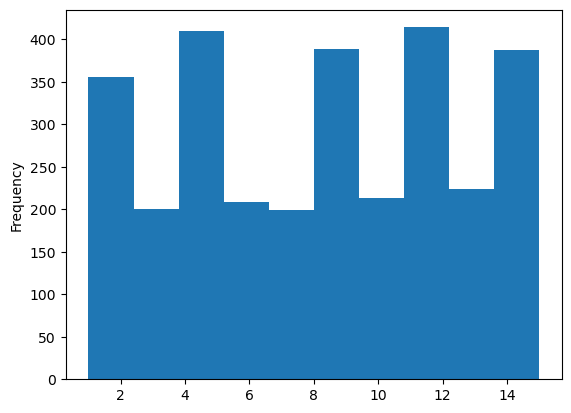

In [11]:
data["weeks_in_course"].plot(kind='hist')

<Axes: ylabel='Frequency'>

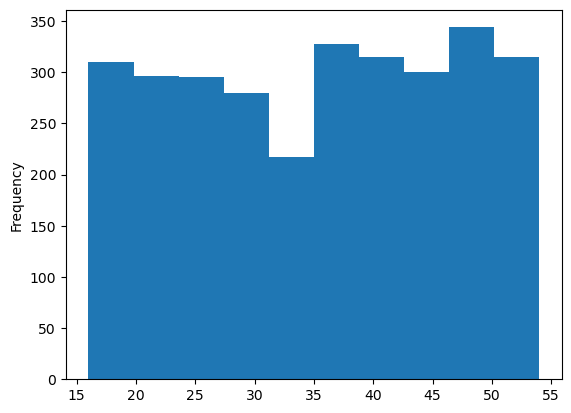

In [12]:
data["age"].plot(kind='hist')

<Axes: ylabel='Frequency'>

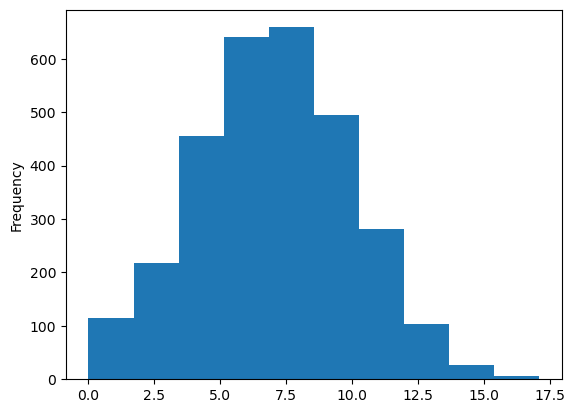

In [13]:
data["hours_spent_learning_per_week"].plot(kind='hist')

<Axes: ylabel='Frequency'>

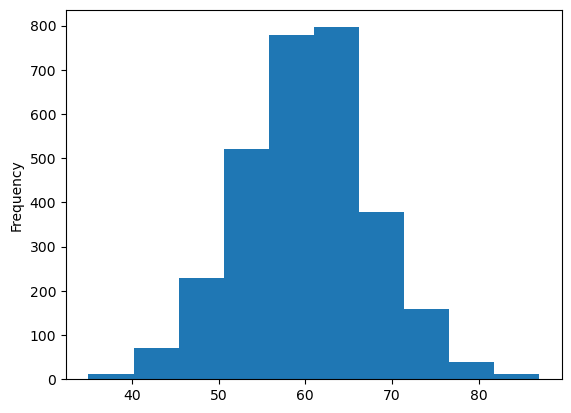

In [14]:
data["practice_problems_solved"].plot(kind='hist')

<Axes: ylabel='Frequency'>

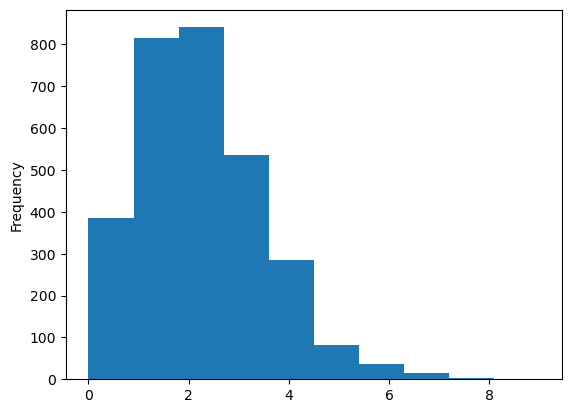

In [15]:
data["projects_completed"].plot(kind='hist')

<Axes: ylabel='Frequency'>

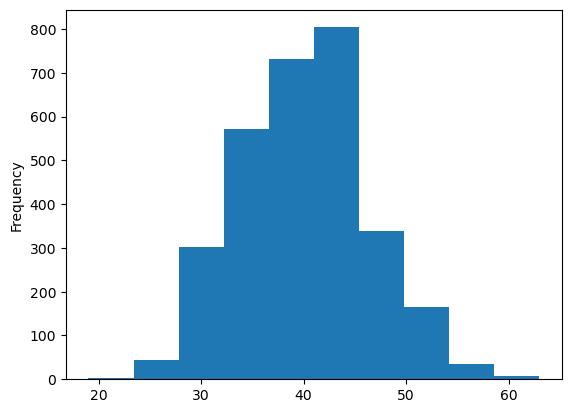

In [16]:
data["tutorial_videos_watched"].plot(kind='hist')

<Axes: ylabel='Frequency'>

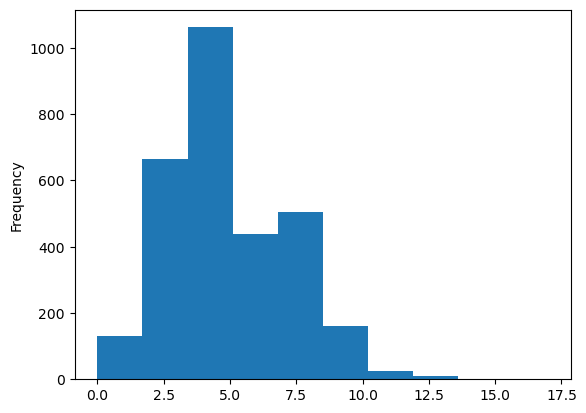

In [17]:
data["debugging_sessions_per_week"].plot(kind='hist')

<Axes: ylabel='Frequency'>

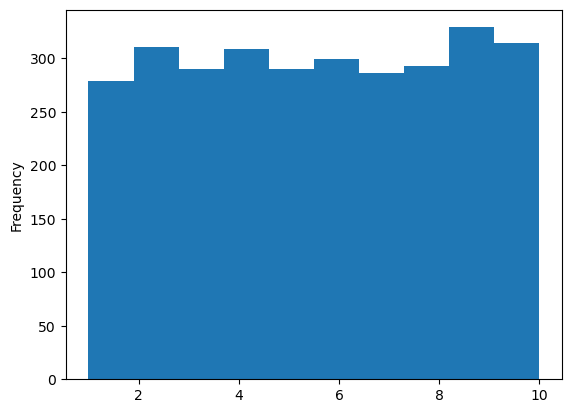

In [18]:
data["self_reported_confidence_python"].plot(kind='hist')

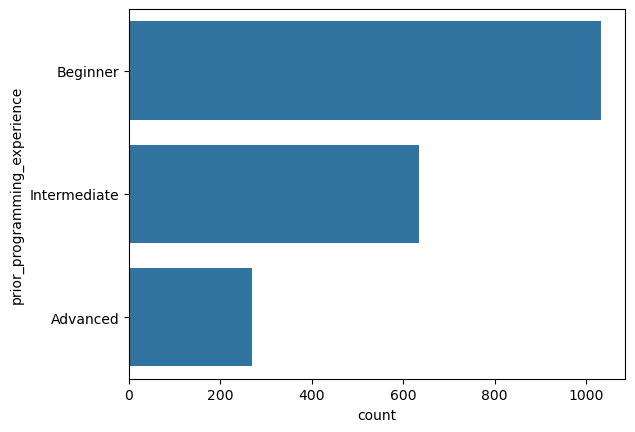

In [19]:
sns.countplot(data["prior_programming_experience"])
plt.show()

`Binary column Analysis`

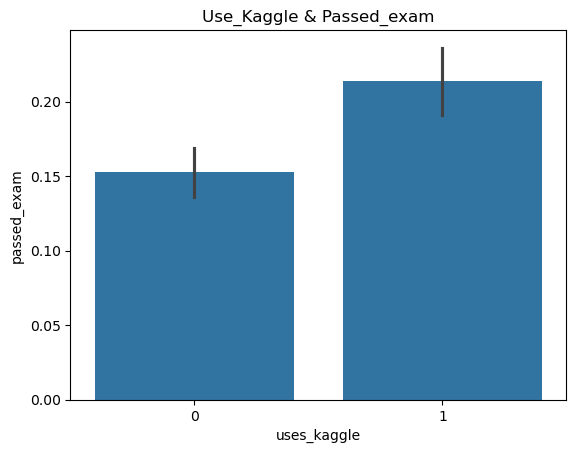

In [20]:
sns.barplot(x="uses_kaggle",y="passed_exam",data=data)
plt.title("Use_Kaggle & Passed_exam")
plt.show()

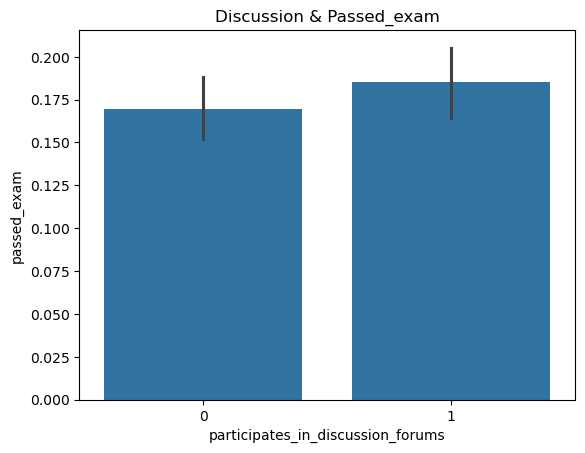

In [21]:
sns.barplot(x="participates_in_discussion_forums",y="passed_exam",data=data)
plt.title("Discussion & Passed_exam")
plt.show()

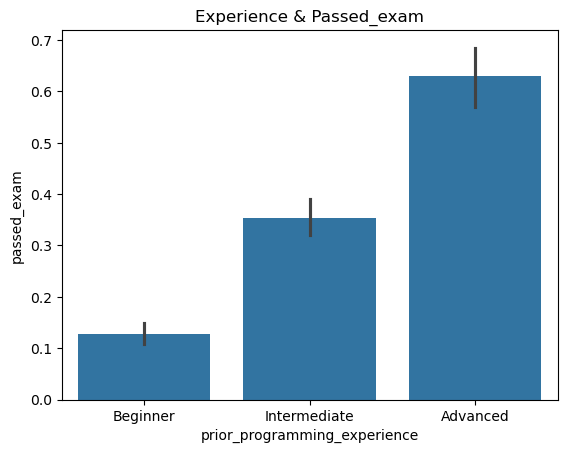

In [22]:
sns.barplot(x="prior_programming_experience",y="passed_exam",data=data)
plt.title("Experience & Passed_exam")
plt.show()

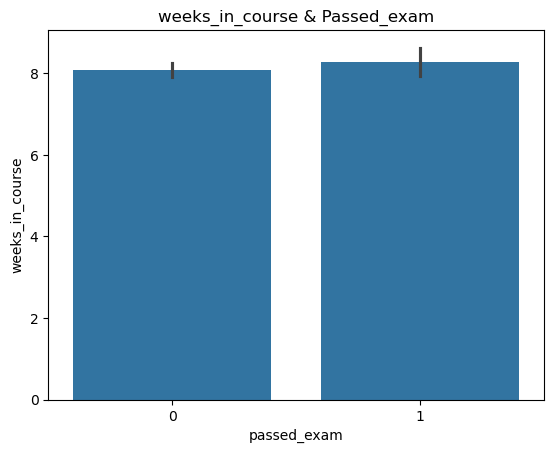

In [23]:
sns.barplot(x="passed_exam",y="weeks_in_course",data=data)
plt.title("weeks_in_course & Passed_exam")
plt.show()

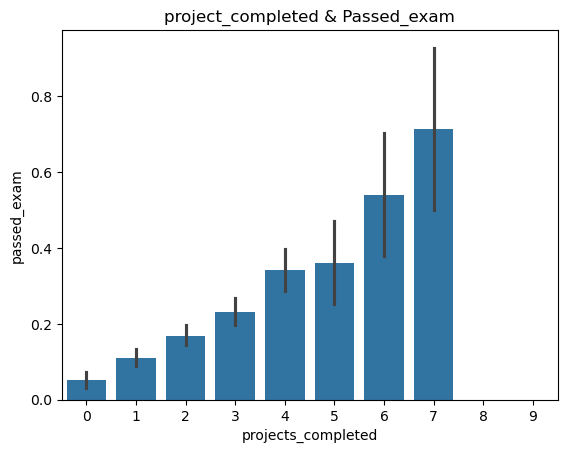

In [24]:
sns.barplot(x="projects_completed",y="passed_exam",data=data)
plt.title("project_completed & Passed_exam")
plt.show()

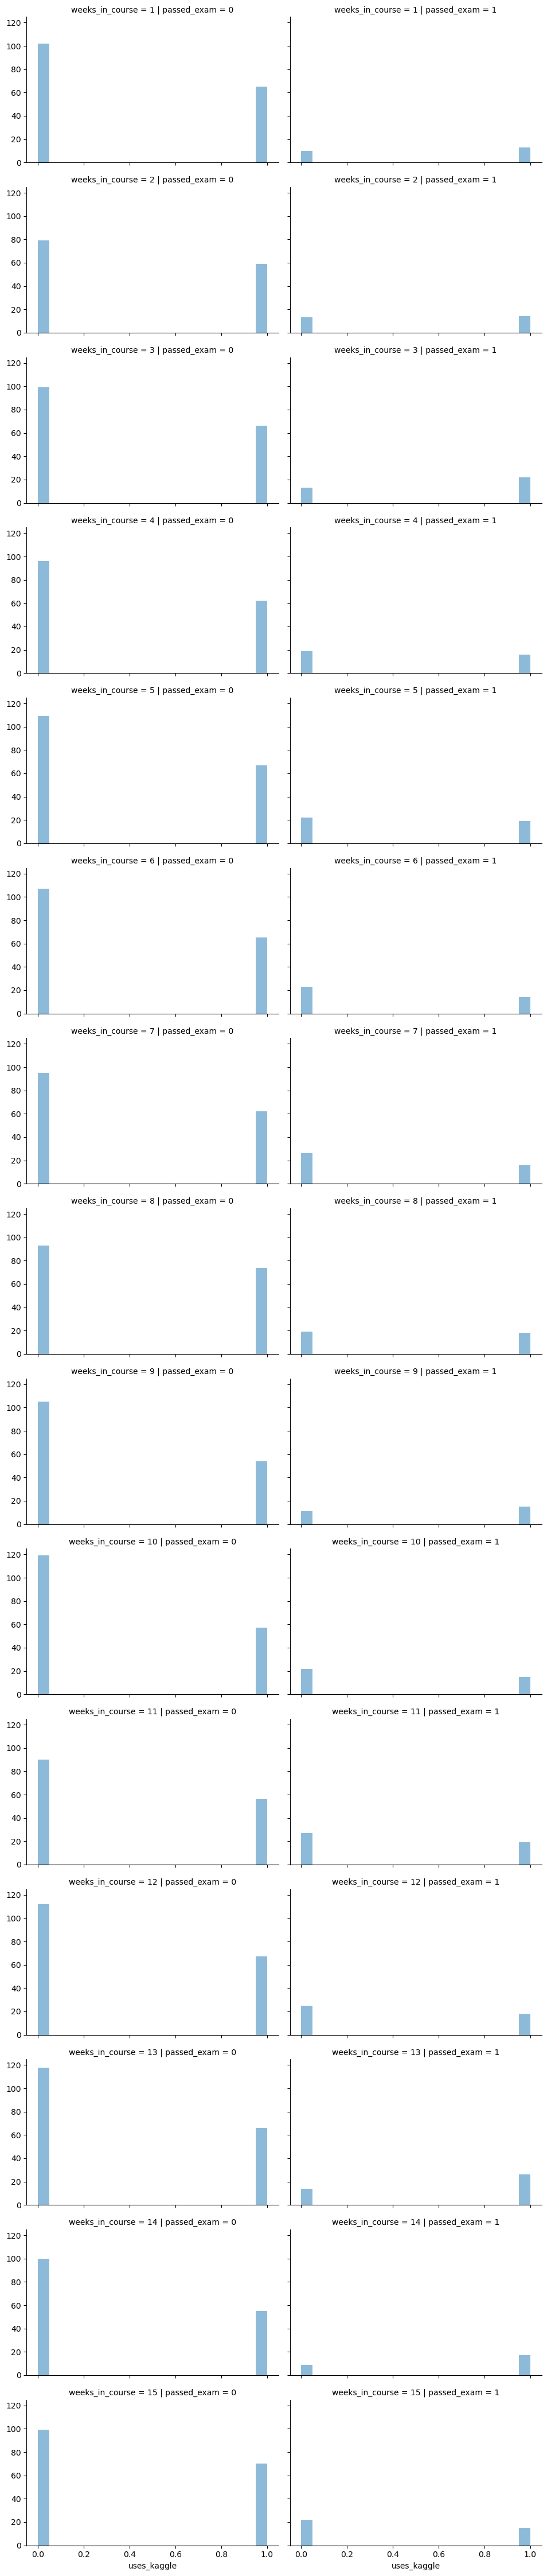

In [25]:
grid = sns.FacetGrid(data, col='passed_exam', row='weeks_in_course', aspect=1.6)
grid.map(plt.hist, 'uses_kaggle', alpha=.5, bins=20)
grid.add_legend()

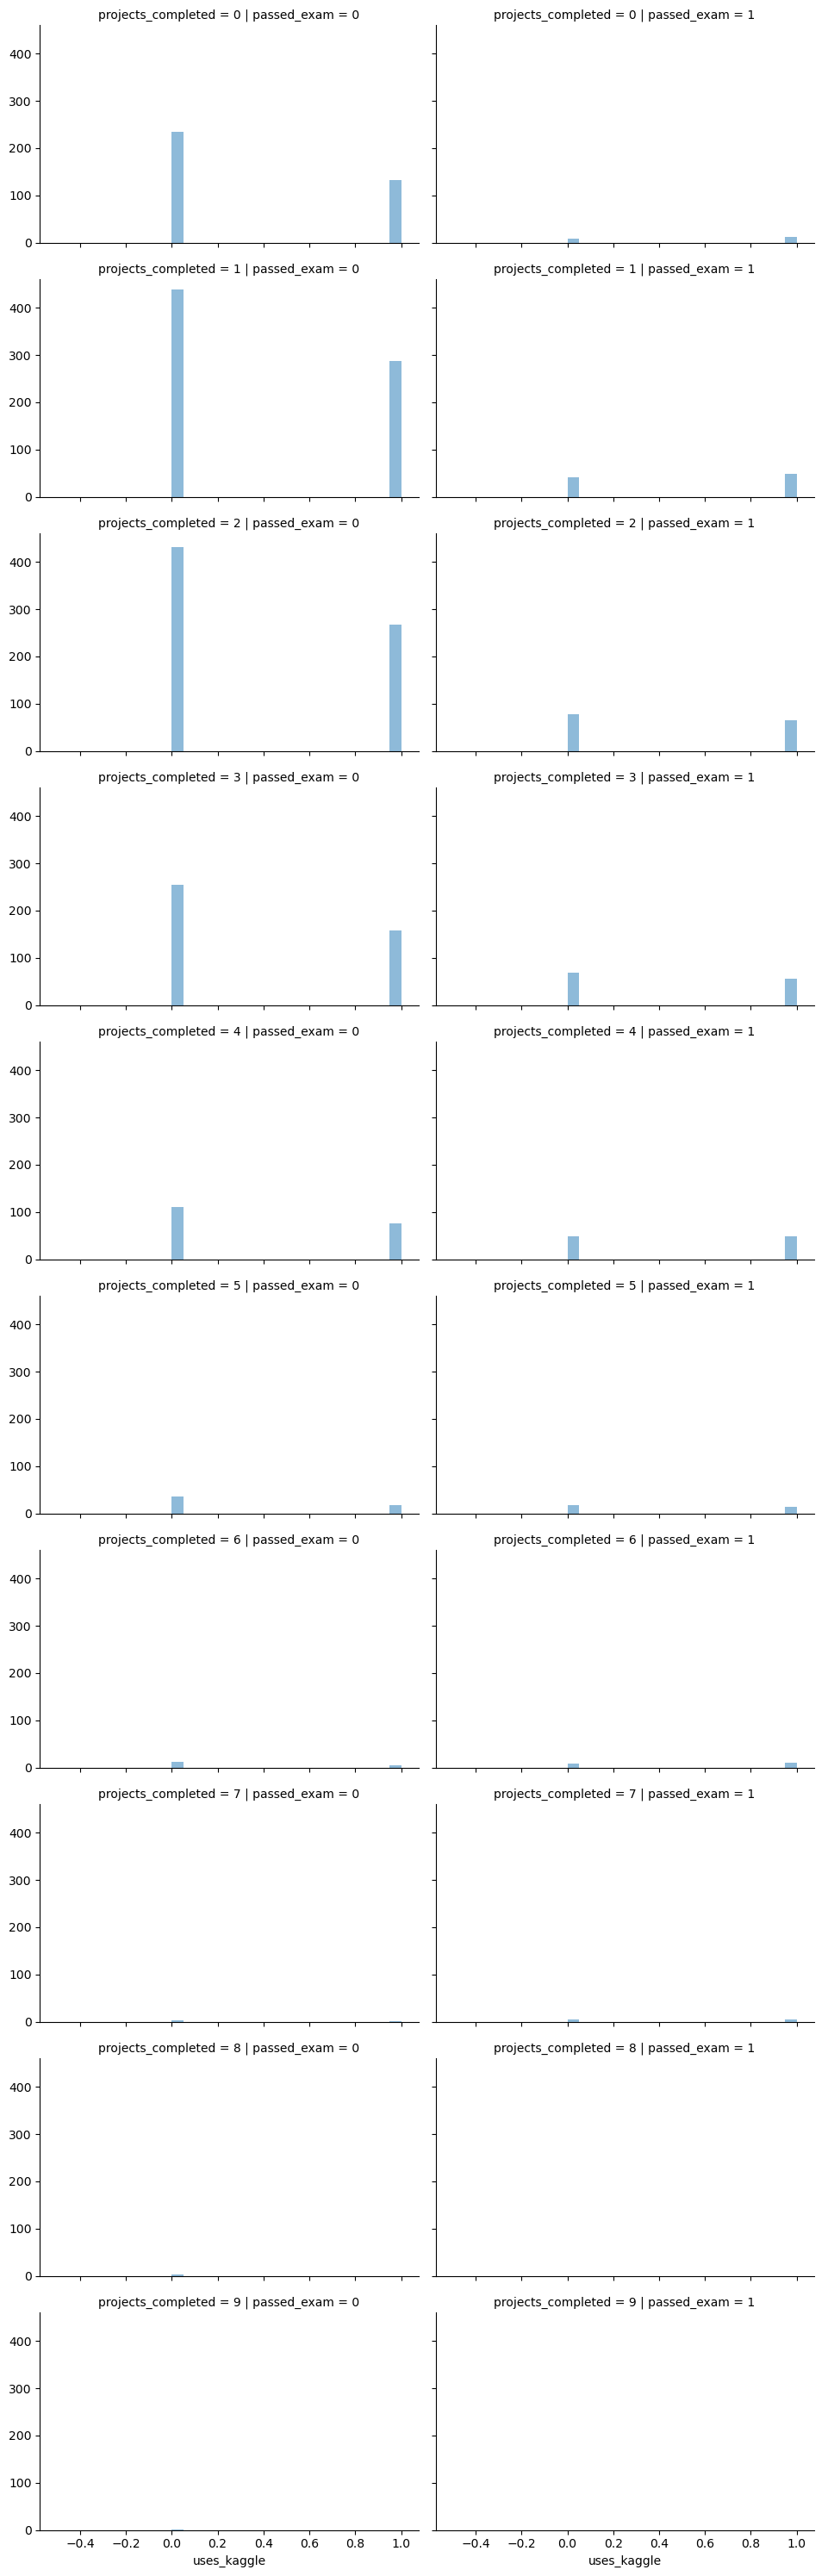

In [26]:
grid = sns.FacetGrid(data, col='passed_exam', row='projects_completed', aspect=1.6)
grid.map(plt.hist, 'uses_kaggle', alpha=.5, bins=20)
grid.add_legend()

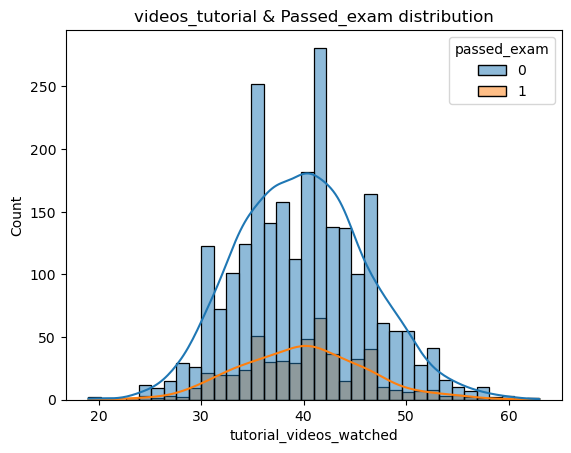

In [29]:
sns.histplot(x="tutorial_videos_watched",hue="passed_exam",kde=True,data=data)
plt.title("videos_tutorial & Passed_exam distribution")
plt.show()

<div style="border-radius: 50px 50px 50px 50px; border: 2px solid black; padding: 20px; background-color: purple; text-align: center; box-shadow: 0px 2px 4px rgba(0, 0, 0, 0.2);width:95%;height:50%">
    <h1 style="color: yellow; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.5); font-weight: bold; margin-bottom: 10px; font-size: 36px;">Feature Encoding</h1>
</div>

In [30]:
data["prior_programming_experience"]=data["prior_programming_experience"].map({"Beginner":0,
                                                                               "Intermediate":1,
                                                                               "Advance":2})

<div style="border-radius: 50px 50px 50px 50px; border: 2px solid black; padding: 20px; background-color: purple; text-align: center; box-shadow: 0px 2px 4px rgba(0, 0, 0, 0.2);width:95%;height:50%">
    <h1 style="color: yellow; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.5); font-weight: bold; margin-bottom: 10px; font-size: 36px;">Handling Missing Values</h1>
</div>

In [31]:
imputer=KNNImputer(n_neighbors=1000)
data["prior_programming_experience"]=imputer.fit_transform(data[["prior_programming_experience"]])

In [32]:
data.isnull().sum()

student_id                           0
age                                  0
country                              0
prior_programming_experience         0
weeks_in_course                      0
hours_spent_learning_per_week        0
practice_problems_solved             0
projects_completed                   0
tutorial_videos_watched              0
uses_kaggle                          0
participates_in_discussion_forums    0
debugging_sessions_per_week          0
self_reported_confidence_python      0
final_exam_score                     0
passed_exam                          0
dtype: int64

<div style="border-radius: 50px 50px 50px 50px; border: 2px solid black; padding: 20px; background-color: purple; text-align: center; box-shadow: 0px 2px 4px rgba(0, 0, 0, 0.2);width:95%;height:50%">
    <h1 style="color: yellow; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.5); font-weight: bold; margin-bottom: 10px; font-size: 36px;">Outlier Detection</h1>
</div>

In [33]:
columns=['age',
       'prior_programming_experience',
       'weeks_in_course',
       'hours_spent_learning_per_week',
       'practice_problems_solved',
       'projects_completed',
       'tutorial_videos_watched',
       'debugging_sessions_per_week',
       'self_reported_confidence_python',
       'final_exam_score',]

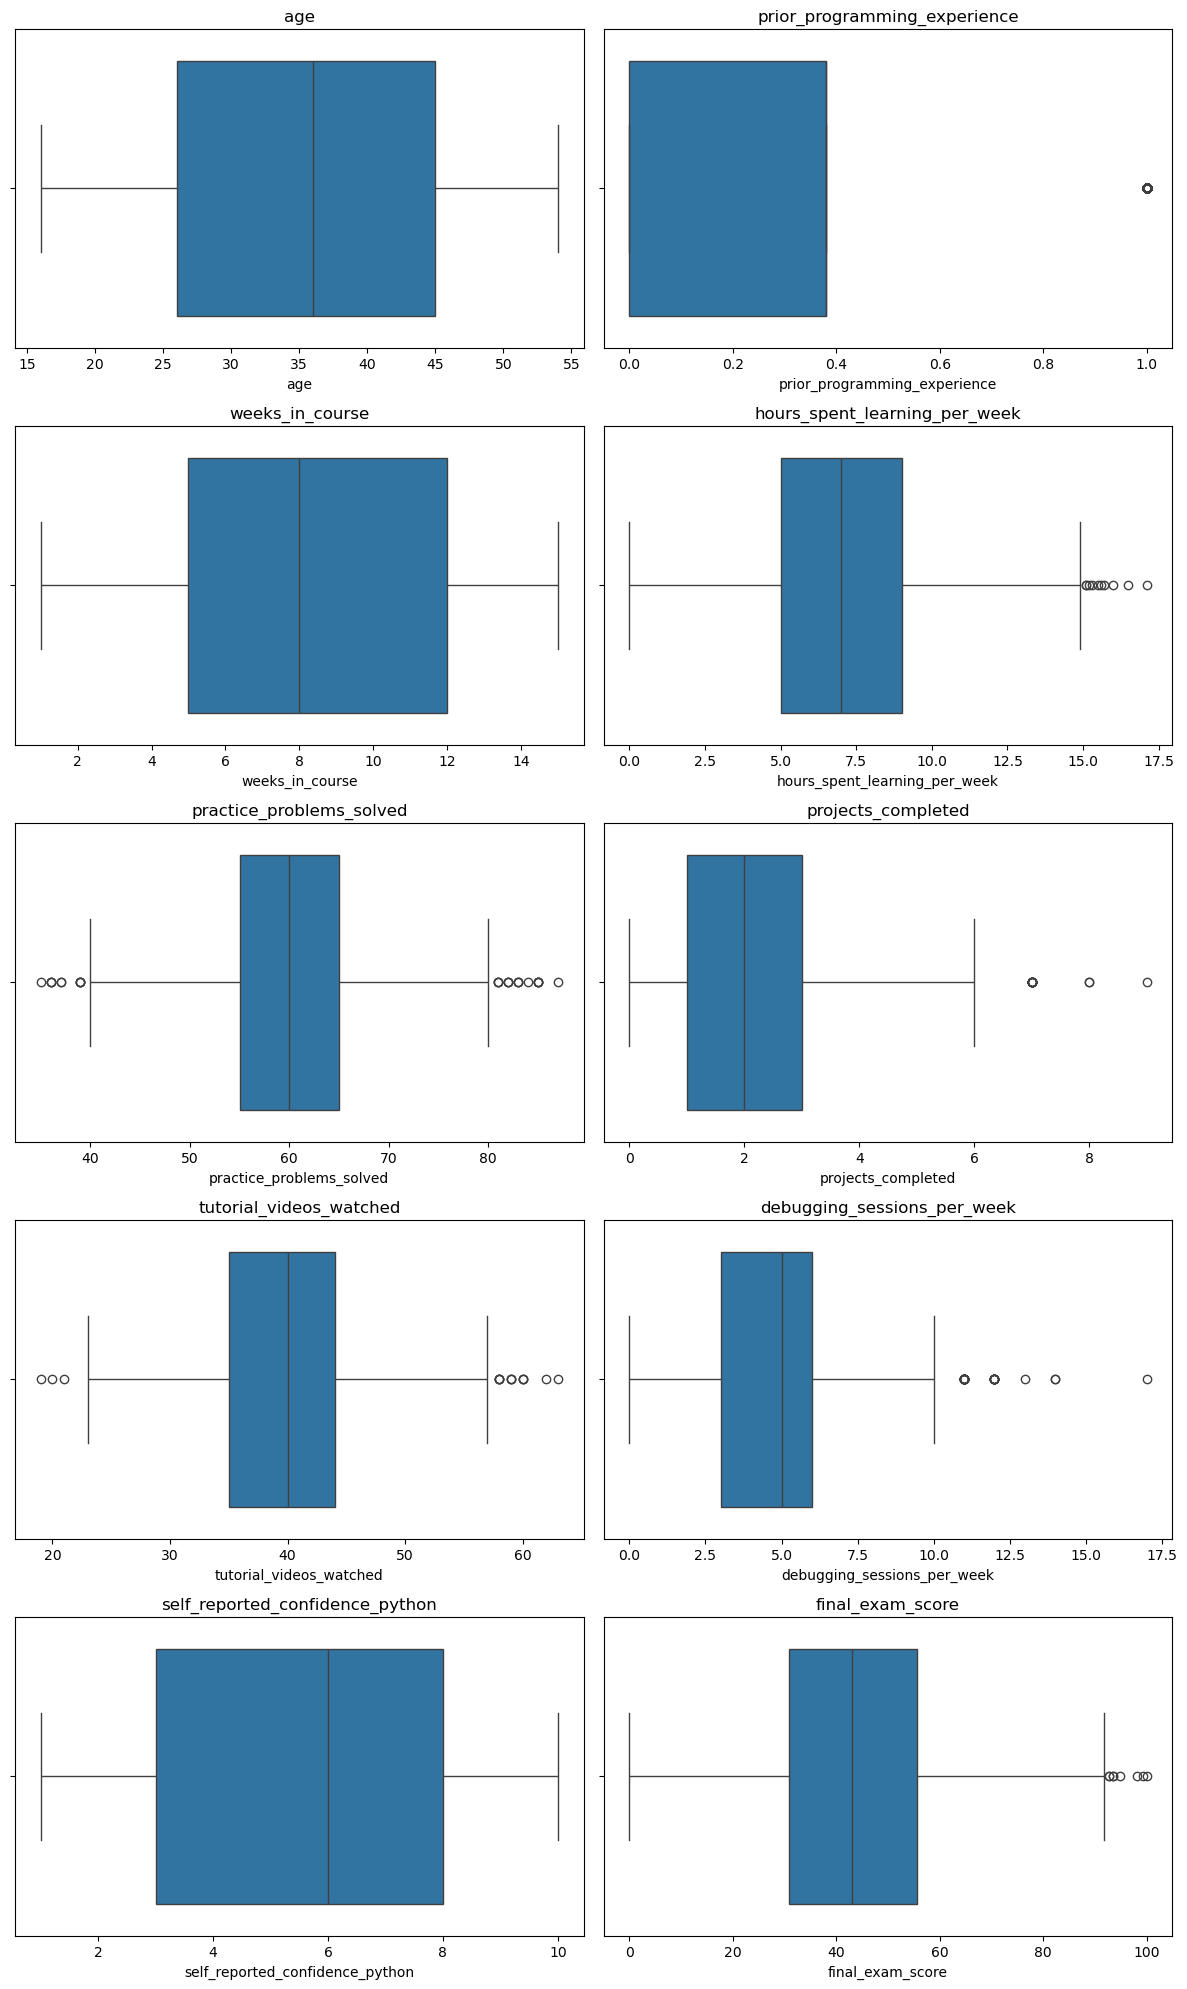

In [34]:
fig, axes = plt.subplots(5, 2, figsize=(12, 20))
for ax, col in zip(axes.flat, columns):
    sns.boxplot(x=col, data=data, ax=ax)
    ax.set_title(f"{col}")
plt.tight_layout()
plt.show()

# Remove Outliers

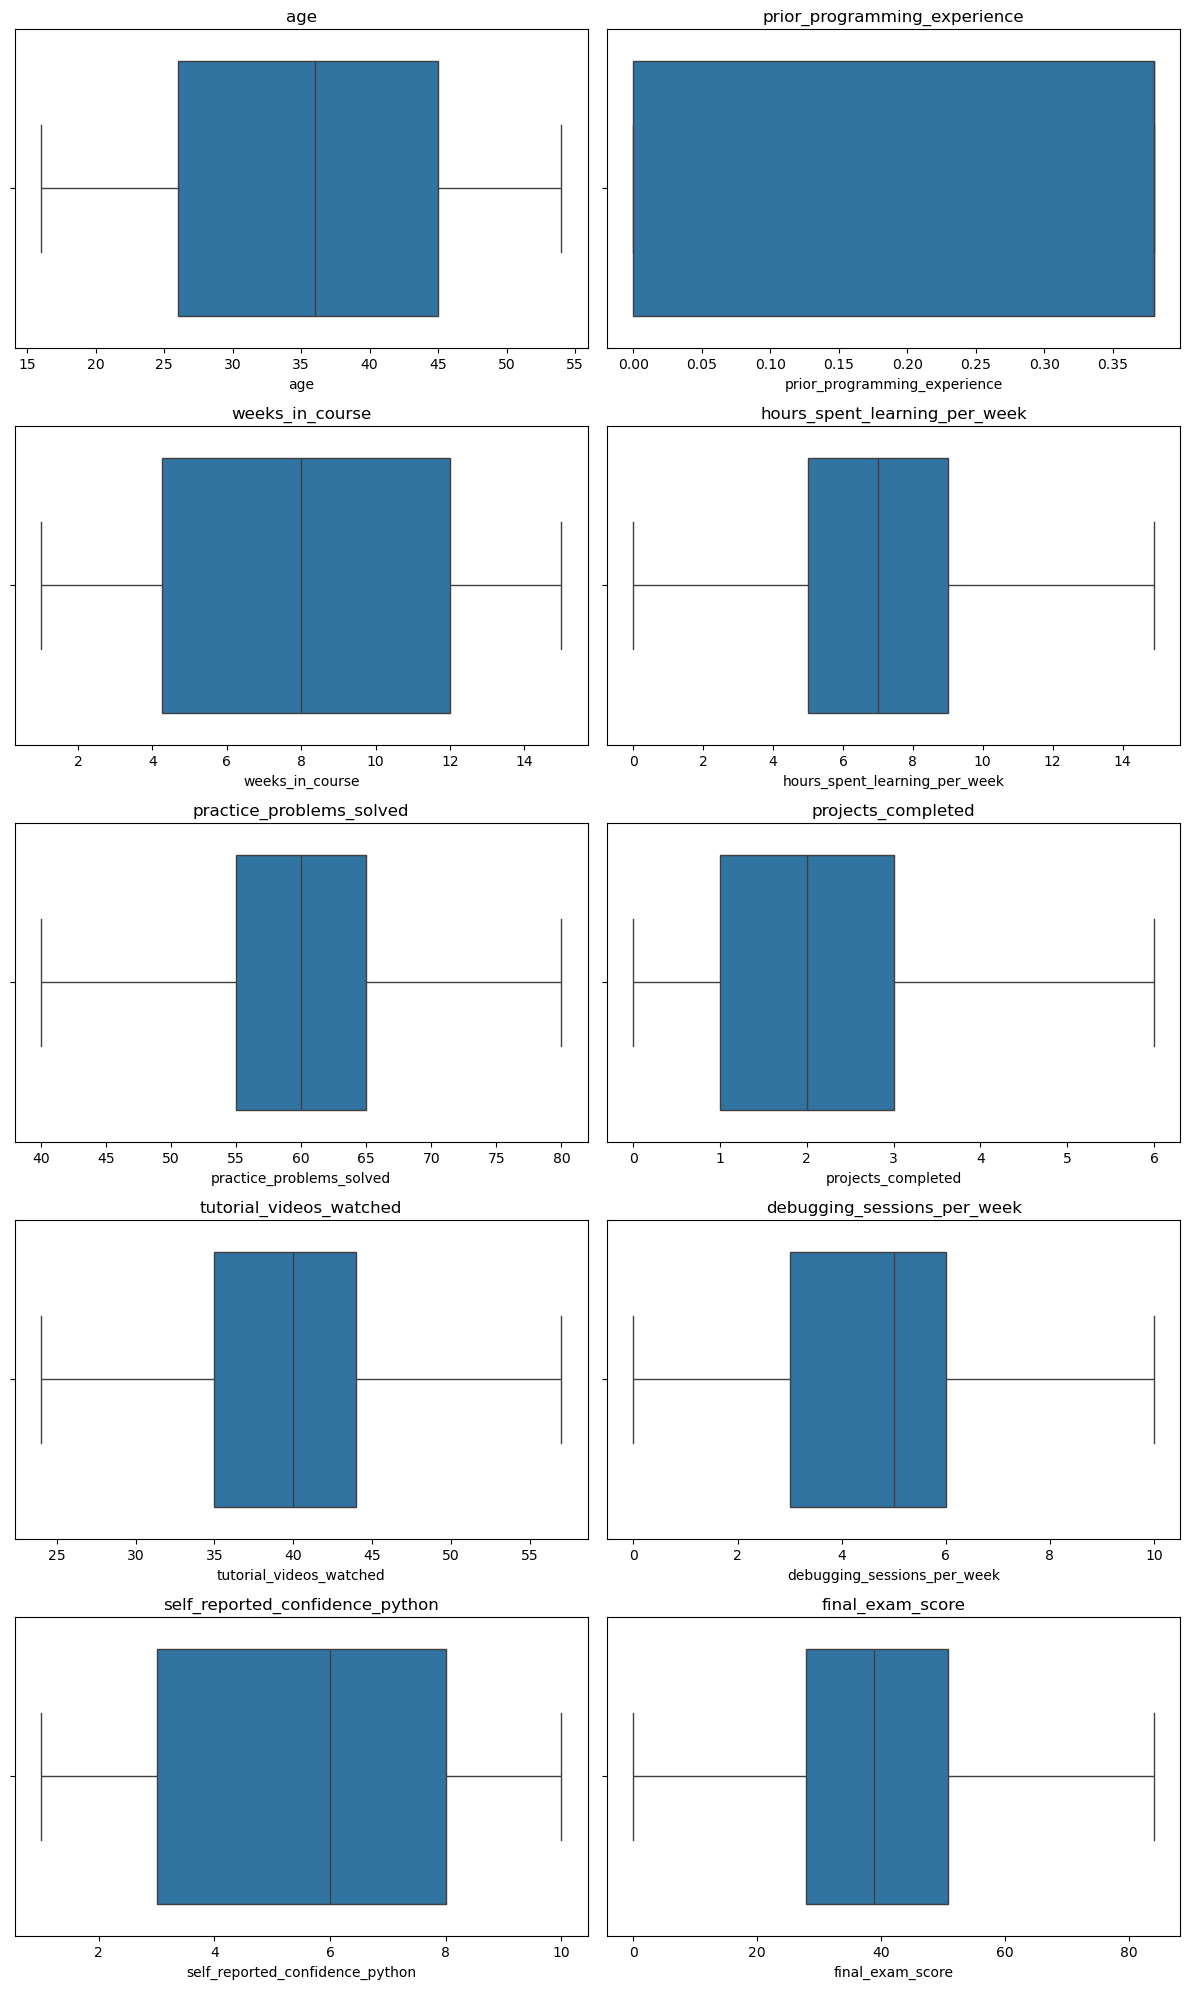

In [35]:
for col in columns:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    data = data[(data[col] >= lower_bound) & (data[col] <= upper_bound)]

fig, axes = plt.subplots(5, 2, figsize=(12, 20))
for ax, col in zip(axes.flat, columns):
    sns.boxplot(x=col, data=data, ax=ax)
    ax.set_title(f"{col}")
plt.tight_layout()
plt.show()

<div style="border-radius: 50px 50px 50px 50px; border: 2px solid black; padding: 20px; background-color: purple; text-align: center; box-shadow: 0px 2px 4px rgba(0, 0, 0, 0.2);width:95%;height:50%">
    <h1 style="color: yellow; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.5); font-weight: bold; margin-bottom: 10px; font-size: 36px;">Feature Selection</h1>
</div>

In [36]:
x=data.drop(columns=["student_id","country","passed_exam"],axis=1)
y=data["passed_exam"]

<div style="border-radius: 50px 50px 50px 50px; border: 2px solid black; padding: 20px; background-color: purple; text-align: center; box-shadow: 0px 2px 4px rgba(0, 0, 0, 0.2);width:95%;height:50%">
    <h1 style="color: yellow; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.5); font-weight: bold; margin-bottom: 10px; font-size: 36px;">Cross Validation | Fit Model</h1>
</div>

# Random Forest

In [41]:
rf = RandomForestClassifier(n_estimators=100,random_state=42)
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Calculate accuracy scores using Cross-Validation
cv_scores = cross_val_score(rf, x, y, cv=kf, scoring='accuracy')

avg_acc = np.mean(cv_scores)
print(f"✅ Cross-Validation Accuracy: {avg_acc:.5f}")

✅ Cross-Validation Accuracy: 0.99956


# XGBoost

In [ ]:
xgb = XGBClassifier(n_estimators=100,random_state=42)
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Calculate accuracy scores using Cross-Validation
cv_scores = cross_val_score(xgb, x, y, cv=kf, scoring='accuracy')

avg_acc = np.mean(cv_scores)
print(f"✅ Cross-Validation Accuracy: {avg_acc:.5f}")

✅ Cross-Validation Accuracy: 0.99868


# Logistic Regression

In [ ]:
lr = LogisticRegression(max_iter=100)
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Calculate accuracy scores using Cross-Validation
cv_scores = cross_val_score(lr, x, y, cv=kf, scoring='accuracy')

avg_acc = np.mean(cv_scores)
print(f"✅ Cross-Validation Accuracy: {avg_acc:.5f}")

In [ ]:
print("\nTraining final model on full dataset...")
lr.fit(x, y)

In [ ]:
# pickle to save model
import pickle
# with open('loan_payback_model.pkl', 'wb') as file:
#     pickle.dump(lr, file)

If you find this notebook useful

Consider it with giving Upvoting❤️

Thank You!